<a href="https://colab.research.google.com/github/parulgo7/GHH22_EmployeeEmpowerment/blob/main/GirlsHooCodeHackathonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 1. Load Data

In [2]:
# Import some common packages
import os
import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import pandas as pd

def loadGapData():
  gapdata = pd.read_csv("/content/sample_data/Glassdoor Gender Pay Gap.csv")
  return gapdata

gapdata = loadGapData()


gapdata.head(10)
gapdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
gapdata['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [6]:
gapdata.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


###Section 2. Data Discovery

In [7]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [8]:
corr_matrix = gapdata.corr()
corr_matrix.shape
corr_matrix['BasePay'].sort_values(ascending=False)

BasePay      1.000000
Age          0.562681
Seniority    0.511096
PerfEval    -0.053622
Bonus       -0.129481
Name: BasePay, dtype: float64

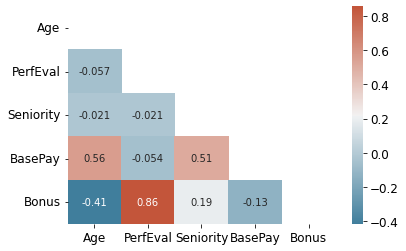

In [9]:
import seaborn as sns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask = mask, cmap=cmap)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cf94faa90>,
      dtype=object)

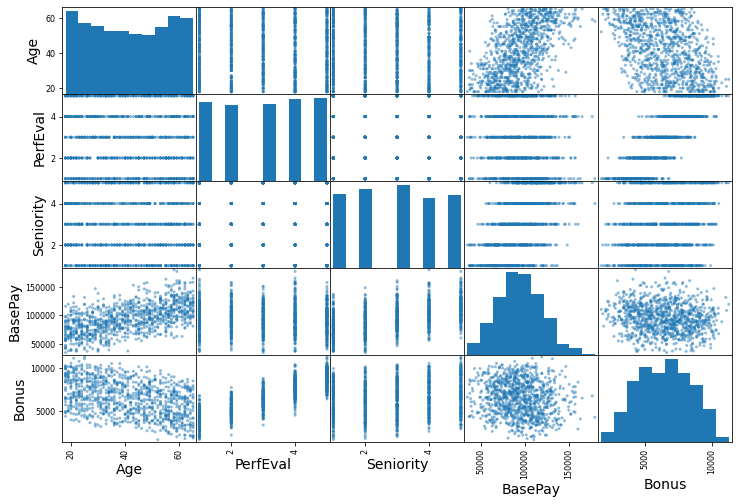

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept', 'Seniority', 'BasePay', 'Bonus']

scatter_matrix(gapdata[attributes], figsize=(12,8))

### Section 3. Feature Engineering, Data Cleaning and Standardization 

In [11]:
gapdata['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [12]:
gapdata['Dept'].unique()

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

In [13]:
def job_groups(x):
  if x == 'Graphic Designer':
    return 'Graphic Designer'
  elif x == 'Software Engineer' or x == 'IT' or x == 'Data Scientist':
    return 'Technical'
  elif x == 'Warehouse Associate' or x == 'Driver':
    return 'Non-Technical'
  elif x == 'Marketing Associate' or 'Sales Associate':
    return 'Sales/Marketing'
  elif x == 'Manager' or x == 'Financial Analyst':
    return 'Management/Finance'

gapdata['JobGroup'] = gapdata['JobTitle'].apply(job_groups)


In [14]:
del gapdata['JobTitle']

In [15]:
# observe numerical attributes in the raw data set
gapdata_num = gapdata.select_dtypes(include=[np.number])
gapdata_num.info()
num_attribs = list(gapdata_num)
print(num_attribs)

# observe categorical attributes in the raw data set
gapdata_cat = gapdata.select_dtypes(include=[object])
gapdata_cat.info()
cat_attribs = list(gapdata_cat)
print(cat_attribs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1000 non-null   int64
 1   PerfEval   1000 non-null   int64
 2   Seniority  1000 non-null   int64
 3   BasePay    1000 non-null   int64
 4   Bonus      1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB
['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Education  1000 non-null   object
 2   Dept       1000 non-null   object
 3   JobGroup   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
['Gender', 'Education', 'Dept', 'JobGroup']


In [16]:
# we want to manually ordinal encode "Education" so that a high school education
# is the lowest value and a PhD is the highest value
scale_mapping = {"High School":0, "College":1, "Masters": 2, "PhD":3}
gapdata["Education"] = gapdata["Education"].replace(scale_mapping)

# ensure that "Education" is now a numerical feature and not a categorical feature
cat_attribs.remove("Education")
num_attribs.append("Education")

print(cat_attribs)
print(num_attribs)

['Gender', 'Dept', 'JobGroup']
['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'Education']


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(gapdata)

New strategy: use k means to visualize clusters of similar employees.

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
y_pred = kmeans.fit_predict(X_prepared)

print(y_pred)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 3
 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 3 4 4 3 4 4 3 4 3 3 4 4 4 4 4 3 4 4
 4 3 4 3 4 4 4 4 3 4 4 3 0 3 4 3 3 4 4 0 3 4 3 4 4 3 4 4 4 4 4 4 3 3 4 4 3
 4 4 0 3 4 3 3 3 4 0 3 4 4 3 3 0 4 0 4 4 4 4 3 4 3 4 4 3 4 3 4 0 0 3 4 4 3
 3 4 4 3 4 0 3 4 0 4 0 3 4 3 4 3 3 4 3 4 4 4 3 4 4 3 0 4 3 4 4 4 3 4 0 3 3
 3 2 3 0 4 4 4 4 2 2 4 0 2 4 3 4 3 0 4 0 4 0 2 3 3 4 4 4 4 4 3 3 4 2 4 3 0
 4 3 4 3 3 3 4 4 4 4 4 3 3 4 3 3 4 3 4 3 3 4 3 4 4 0 4 3 3 4 4 0 4 2 3 4 3
 4 4 3 4 3 2 4 0 4 4 3 2 3 0 3 4 4 0 2 4 2 3 3 2 0 4 3 4 4 3 3 0 3 2 4 3 4
 0 3 3 3 0 2 2 0 3 4 2 0 2 0 4 4 3 0 0 3 0 0 2 3 0 4 4 4 4 2 3 2 3 0 2 3 4
 4 0 0 2 3 3 3 3 3 0 2 2 3 4 2 2 0 2 0 4 3 3 0 0 3 0 2 4 3 3 2 2 3 2 3 2 3
 3 2 2 3 0 4 0 2 4 3 2 0 4 3 3 0 2 4 0 2 0 0 0 0 3 2 3 0 3 3 2 0 4 3 2 3 3
 0 2 0 2 3 2 3 0 2 2 0 2 0 4 2 3 3 0 0 3 2 2 0 0 4 4 4 0 2 3 0 2 3 3 3 3 0
 2 0 0 3 2 3 3 2 0 2 0 3 

Now, let's graph Inertia vs. K to determine the 'elbow' location to find the optimal number of k! 

In [19]:
kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 4, 4, 0, 3,
       4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 0, 3, 4, 3,
       3, 3, 4, 0, 3, 4, 4, 3, 3, 0, 4, 0, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3,
       4, 3, 4, 0, 0, 3, 4, 4, 3, 3, 4, 4, 3, 4, 0, 3, 4, 0, 4, 0, 3, 4,
       3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 0, 4, 3, 4, 4, 4, 3, 4, 0,
       3, 3, 3, 2, 3, 0, 4, 4, 4, 4, 2, 2, 4, 0, 2, 4, 3, 4, 3, 0, 4, 0,
       4, 0, 2, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 2, 4, 3, 0, 4, 3, 4, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 0, 4,
       3, 3, 4, 4, 0, 4, 2, 3, 4, 3, 4, 4, 3, 4, 3,

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

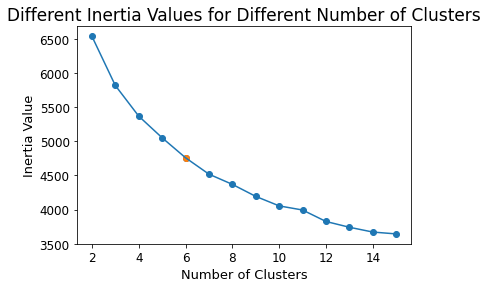

In [20]:
inertia_list = []

for clusters in range(2,16):
  model = KMeans(n_clusters=clusters, init="random", n_init=1, 
                 algorithm="full", max_iter=300, random_state=1)
  model.fit_predict(X_prepared)
  inertia_list.append(model.inertia_)

plt.plot(range(2,16),inertia_list)
plt.scatter(range(2,16),inertia_list)
plt.scatter(6, inertia_list[4])
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

Here we can see that our 'elbow' is at k = 5. That means that 5 clusters is optimal for the dataset that we've prepared! 

Now, let's go ahead and visualize our clusters along different axises!!! 

In [21]:
gapdata

,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,JobGroup
0,Female,18,5,1,Operations,2,42363,9938,Graphic Designer
1,Male,21,5,1,Management,5,108476,11128,Technical
2,Female,19,4,3,Administration,5,90208,9268,Non-Technical
3,Male,20,5,2,Sales,4,108080,10154,Technical
4,Male,26,5,2,Engineering,5,99464,9319,Graphic Designer
...,...,...,...,...,...,...,...,...,...
995,Female,61,1,0,Administration,1,62644,3270,Sales/Marketing
996,Male,57,1,2,Sales,2,108977,3567,Technical
997,Male,48,1,0,Operations,1,92347,2724,Sales/Marketing
998,Male,65,2,0,Administration,1,97376,2225,Sales/Marketing


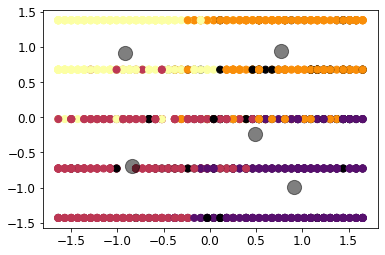

In [22]:
model = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
y_pred = model.fit_predict(X_prepared)


X_col = 0
Y_col = 1

plt.scatter(X_prepared[:, X_col], X_prepared[:, Y_col], c=y_pred, s=50, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, X_col], centers[:, Y_col], c='black', s=200, alpha=0.5);

# plt.xlabel("longitude")
# plt.ylabel("latitude")


In [23]:
print(model.cluster_centers_)

[[ 0.49081045 -0.23287913  0.98900475  1.1930729  -0.13890166  0.65433102
   0.32777778  0.67222222  0.19444444  0.23333333  0.21666667  0.15
   0.20555556  0.08888889  0.10555556  0.45555556  0.35      ]
 [ 0.90852121 -0.9874754  -0.28117615  0.30479353 -1.29338218 -0.22894773
   0.6         0.4         0.23157895  0.14210526  0.14736842  0.25263158
   0.22631579  0.08421053  0.16315789  0.47368421  0.27894737]
 [-0.83606922 -0.68690784 -0.38200673 -0.8589218  -0.37853078 -0.37204181
   0.47031963  0.52968037  0.19178082  0.17351598  0.23287671  0.21004566
   0.19178082  0.09589041  0.20091324  0.39726027  0.30593607]
 [ 0.77322964  0.9386155  -0.3479262   0.19037316  0.43605937 -0.30088202
   0.43502825  0.56497175  0.13559322  0.16949153  0.20338983  0.24858757
   0.24293785  0.12429379  0.22033898  0.37853107  0.27683616]
 [-0.91763845  0.91383096  0.08822661 -0.50536781  1.18145575  0.2583494
   0.49145299  0.50854701  0.20512821  0.23504274  0.18803419  0.19230769
   0.17948718  

Cluster 0
                    Mean  Standard Deviation
Age            48.405556           11.791341
PerfEval        2.705556            1.189795
Education       2.200000            0.848265
Seniority       4.350000            0.808302
BasePay    124687.011111        18062.553731
Bonus        6188.888889         1379.881955
   Gender  Percentage
0    Male    0.672222
1  Female    0.327778
             Dept  Percentage
0     Engineering    0.233333
1      Management    0.216667
2           Sales    0.205556
3  Administration    0.194444
4      Operations    0.150000
           JobGroup  Percentage
0   Sales/Marketing    0.455556
1         Technical    0.350000
2     Non-Technical    0.105556
3  Graphic Designer    0.088889 

Cluster 1
                    Mean  Standard Deviation
Age            54.373684            7.355115
PerfEval        1.631579            0.706023
Education       1.210526            1.097325
Seniority       2.578947            1.204743
BasePay    102191.494737        

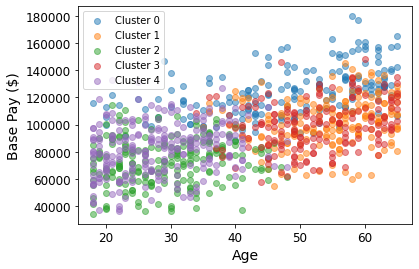

In [35]:
means = []
std_devs = []

for i in range(len(model.cluster_centers_)): # for each cluster that the model made
  indices = np.where(model.labels_ == i)[0]
  raw_cluster_samples = gapdata.iloc[indices]
  cluster_samples = X_prepared[indices]

  cluster_feature_means = raw_cluster_samples.mean(axis=0, numeric_only=True)
  cluster_feature_std_devs = raw_cluster_samples.std(axis=0, numeric_only=True)
  means.append(cluster_feature_means)
  std_devs.append(cluster_feature_std_devs)

  print("Cluster", i)
  stats = { 'Mean': cluster_feature_means, 'Standard Deviation': cluster_feature_std_devs }
  stats = pd.DataFrame(stats)
  print(stats)

  gender = raw_cluster_samples["Gender"].value_counts().rename_axis('Gender').reset_index(name='Percentage')
  gender["Percentage"] = gender["Percentage"] / len(raw_cluster_samples)
  dept = raw_cluster_samples["Dept"].value_counts().rename_axis('Dept').reset_index(name='Percentage')
  dept["Percentage"] = dept["Percentage"] / len(raw_cluster_samples)
  jobGroups = raw_cluster_samples["JobGroup"].value_counts().rename_axis('JobGroup').reset_index(name='Percentage')
  jobGroups["Percentage"] = jobGroups["Percentage"] / len(raw_cluster_samples)
  cat_stats = pd.concat([gender, dept, jobGroups], axis=1)
  print(gender)
  print(dept)
  print(jobGroups, "\n")
  plt.scatter(raw_cluster_samples["Age"], raw_cluster_samples["BasePay"], alpha=0.5, label=("Cluster "+str(i)))
  plt.xlabel("Age")
  plt.ylabel("Base Pay ($)")
plt.legend()